In [17]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp

/var/folders/pk/xl4598515pb7q2jfw1tdzyr00000gn/T/ipykernel_76396/4272589195.py:9: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  tsz_map_1024 = hp.read_map(fits_file, field=0, hdu=1, verbose=True)


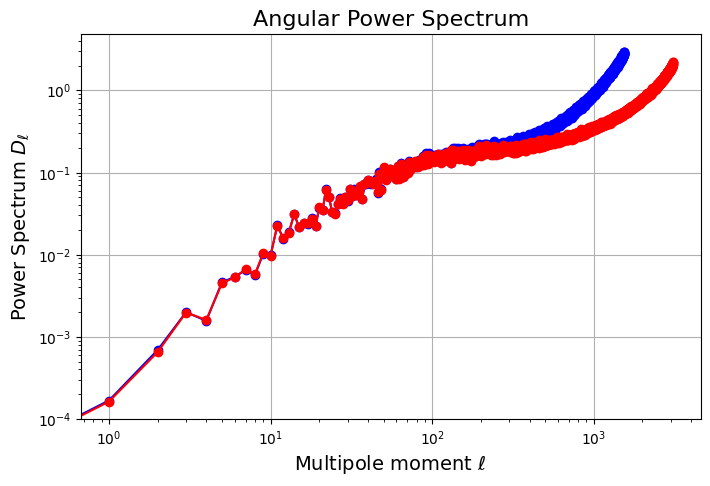

In [18]:
nside_512 = 512
window = hp.pixwin(nside_512)
nside_1024 = 1024
window_1024 = hp.pixwin(nside_1024)
# print(window)
# Load the full sky map from the FITS file
tsz_map = hp.read_map('/Users/licongxu/Work/fits_maps_cat/tsz_map_hp.fits')
fits_file = "/Users/licongxu/Work/fits_maps_cat/tsz_map_hp_1024.fits"
tsz_map_1024 = hp.read_map(fits_file, field=0, hdu=1, verbose=True)
# Compute the angular power spectrum (Cl's)

cl = hp.anafast(tsz_map)
correct_fact_512 = window[:len(cl)]**2
cl = cl/correct_fact_512

cl_1024 = hp.anafast(tsz_map_1024)
correct_fact_1024 = window_1024[:len(cl_1024)]**2
cl_1024 = cl_1024/correct_fact_1024
# Define the multipole moments (ℓ)
ell = np.arange(len(cl))
ell_1024 = np.arange(len(cl_1024))
dl = ell*(ell+1)*cl/(2*np.pi)*1e12
dl_1024 = ell_1024*(ell_1024+1)*cl_1024/(2*np.pi)*1e12

# Plot the power spectrum
plt.figure(figsize=(8,5))
plt.loglog(ell, dl, marker='o', linestyle='-', color='b')
plt.loglog(ell_1024, dl_1024, marker='o', linestyle='-', color='r')
plt.xlabel(r'Multipole moment $\ell$', fontsize=14)
plt.ylabel(r'Power Spectrum $D_\ell$', fontsize=14)
plt.title('Angular Power Spectrum', fontsize=16)
plt.grid(True)
plt.show()


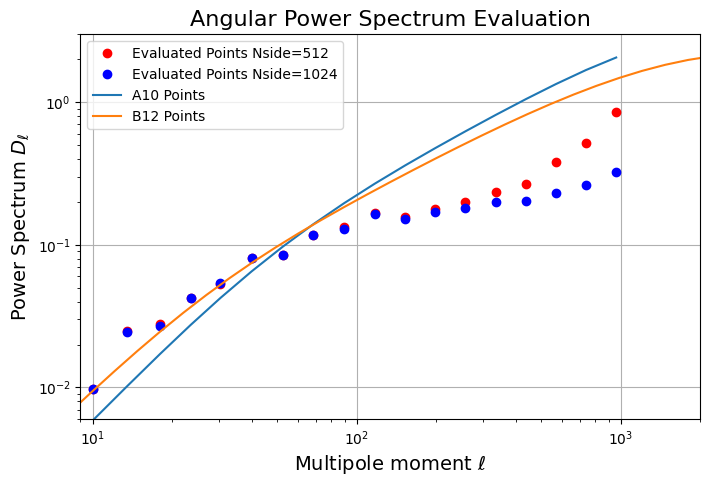

In [19]:
# Define the ell values at which to evaluate the power spectrum
ell_eval = jnp.array([10., 13.5, 18., 23.5, 30.5, 40., 52.5, 68.5, 89.5, 
                        117., 152.5, 198., 257.5, 335.5, 436.5, 567.5, 738., 959.5])

# Convert ell_eval from a jax numpy array to a standard numpy array for interpolation
ell_eval_np = np.array(ell_eval)

# Interpolate the computed Cl values at the desired ell positions
cl_eval = np.interp(ell_eval_np, ell, cl)
cl_1024_eval = np.interp(ell_eval_np, ell_1024, cl_1024)

dl_eval = ell_eval_np*(ell_eval_np+1)*cl_eval/(2*np.pi)*1e12
dl_1024_eval = ell_eval_np*(ell_eval_np+1)*cl_1024_eval/(2*np.pi)*1e12
# Print the evaluated power spectrum values
# print("Evaluated Cl values at specified ell:")
# for e, cl_val in zip(ell_eval_np, cl_eval):
#     print(f"ell = {e:6.1f}, Cl = {cl_val:.4e}")

d_ell_fid = np.array([0.00585248 ,0.01018324, 0.01716016, 0.0274143, 0.04245484,0.0651305,
 0.09711297, 0.13953595 ,0.19565427, 0.26833979 ,0.36035401 ,0.4758853,
 0.62392058, 0.81335734 ,1.05007944 ,1.33970365, 1.68124226 ,2.05699844])

l = np.array([2.00000000e+00, 2.44280552e+00, 2.98364940e+00, 3.64423760e+00,
       4.45108186e+00, 5.43656366e+00, 6.64023385e+00, 8.11039993e+00,
       9.90606485e+00, 1.20992949e+01, 1.47781122e+01, 1.80500270e+01,
       2.20463528e+01, 2.69274761e+01, 3.28892935e+01, 4.01710738e+01,
       4.90650604e+01, 5.99282001e+01, 7.31964689e+01, 8.94023690e+01,
       1.09196300e+02, 1.33372662e+02, 1.62901737e+02, 1.98968631e+02,
       2.43020835e+02, 2.96826318e+02, 3.62544484e+02, 4.42812832e+02,
       5.40852815e+02, 6.60599120e+02, 8.06857587e+02, 9.85498082e+02,
       1.20369008e+03, 1.47019038e+03, 1.79569458e+03, 2.19326632e+03,
       2.67886153e+03, 3.27196886e+03, 3.99639179e+03, 4.88120396e+03,
       5.96191597e+03, 7.28190061e+03])

dl_b12 = np.array([5.62380324e-04, 7.94048363e-04, 1.12611222e-03, 1.60205182e-03,
       2.28303930e-03, 3.25409609e-03, 4.63152142e-03, 6.57087551e-03,
       9.27379140e-03, 1.29910434e-02, 1.80200604e-02, 2.46947509e-02,
       3.33712823e-02, 4.44088810e-02, 5.81662899e-02, 7.50137365e-02,
       9.53714931e-02, 1.19761679e-01, 1.48864818e-01, 1.83558925e-01,
       2.24940516e-01, 2.74317428e-01, 3.33177846e-01, 4.03137895e-01,
       4.85847479e-01, 5.82856190e-01, 6.95444629e-01, 8.24333188e-01,
       9.69403789e-01, 1.12930202e+00, 1.30103319e+00, 1.47969113e+00,
       1.65826864e+00, 1.82769896e+00, 1.97766303e+00, 2.09698992e+00,
       2.17528226e+00, 2.20421993e+00, 2.17887422e+00, 2.09897213e+00,
       1.96828241e+00, 1.79545288e+00])

# Optionally, plot the interpolated points along with the full power spectrum
plt.figure(figsize=(8,5))
# plt.plot(ell, dl, label='Full Power Spectrum')
plt.plot(ell_eval_np, dl_eval, 'ro', label='Evaluated Points Nside=512')
plt.plot(ell_eval_np, dl_1024_eval, 'bo', label='Evaluated Points Nside=1024')
plt.plot(ell_eval_np, d_ell_fid, '-', label='A10 Points')
plt.plot(l, dl_b12, '-', label='B12 Points')
plt.xlabel(r'Multipole moment $\ell$', fontsize=14)
plt.ylabel(r'Power Spectrum $D_\ell$', fontsize=14)
plt.title('Angular Power Spectrum Evaluation', fontsize=16)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(9, 2e3)
plt.ylim(6e-3, 3e0)
plt.grid(True)
plt.show()